### Importing required packages

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize

In [19]:
df = pd.read_csv('/content/drive/MyDrive/sem 7/ID5055/Assignment 2/q4 Gene_expression.csv')

<ipython-input-20-3fac749752ce>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


<Axes: title={'center': 'Data Distribution Histogram'}, ylabel='Density'>

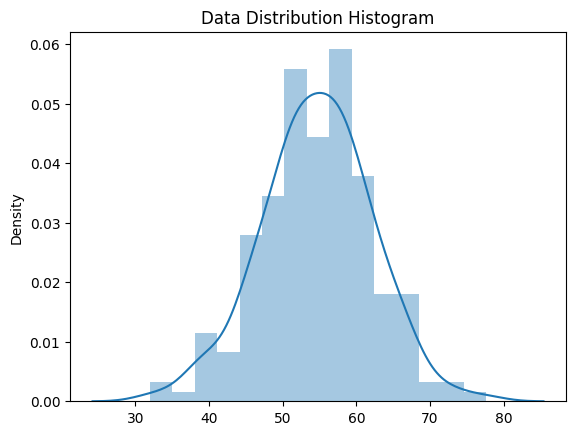

In [20]:
plt.title('Data Distribution Histogram')
sns.distplot(df)

### Assume the prior distribution of μ to be a normal distribution. You can take the sample mean of Day 1 samples and variance as prior parameters.

Given:

1. mean of the distribution $\mu_0$ = mean of the Day 1 samples

2. variance of the distribution $σ_0^2$ = variance of the Day 1 samples

In [21]:
day1 = df.iloc[:, 0]
mu_0 = np.mean(day1, axis = 0)
sigma_0 = np.std(day1, axis = 0)

print(f"mean of the prior distribution is {mu_0}")
print(f"stanadrd deviation of the prior distribution is {sigma_0}")

mean of the prior distribution is 53.0472556695
stanadrd deviation of the prior distribution is 8.826980817204479


### Estimate the posterior distribution of μ using samples from Day 1

Gene expression levels distribution is given by:

$
f(x; \mu, \sigma = 8) = \frac{1}{8\sqrt{2\pi}} \exp\left(-\frac{(x - \mu)^2}{128}\right)
$


The prior distribution is given by:

$
f(\mu; \mu_0, \sigma_0) = \frac{1}{\sigma_0\sqrt{2\pi}} \exp\left(-\frac{(\mu - \mu_0)^2}{2\sigma_0^2}\right)
$

where $\mu_0$ = 6.0337401566764175 and standard deviation $\sigma_0$ = 3.5503391410788043.

Estimated mu: 53.04723720260668


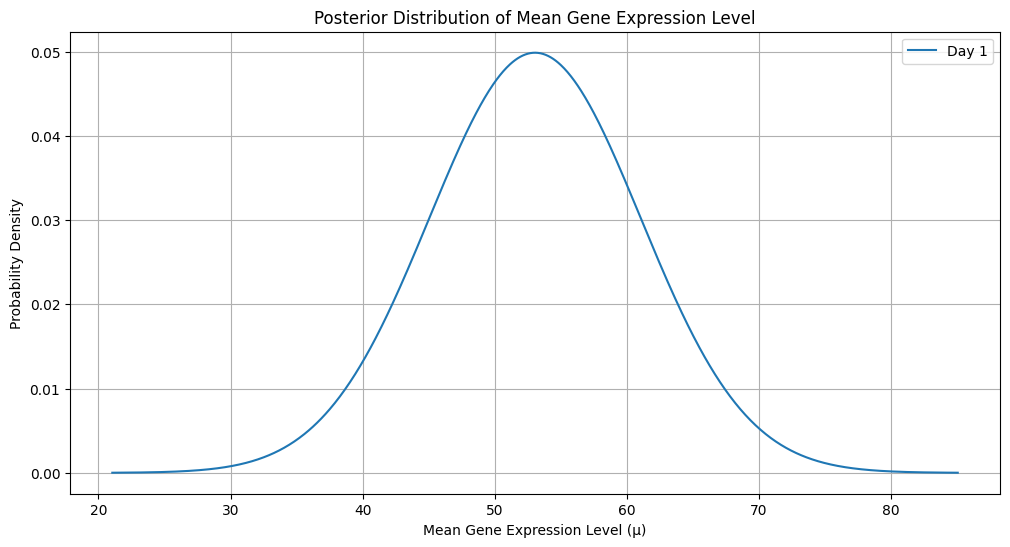

In [22]:
def map_log_likelihood(parameters, data, prior_mu, prior_std):
    mu = parameters
    if mu < 0:
        return np.inf
    log_likelihood = np.sum(np.log((1/(8*(2**0.5)*(np.pi)))*np.exp(-((data - mu)**2)/128))) + np.sum(np.log((1/(prior_std*(2**0.5)*(np.pi)))*np.exp(-((mu - prior_mu)**2)/(2*(prior_std**2)))))
    return -log_likelihood

initail_parameters = [1.0]

result = minimize(map_log_likelihood, initail_parameters, args = (df.iloc[:, 0], mu_0, sigma_0))

# Estimated parameter
estimated_mu = result.x[0]
print("Estimated mu:", estimated_mu)

# Plot the probability distribution of the mean gene expression level each time after the update
plt.figure(figsize=(12, 6))
x = np.linspace(estimated_mu - 4*8, estimated_mu + 4*8, 1000)
y = norm.pdf(x, loc=estimated_mu, scale=8)
plt.plot(x, y, label=f'Day 1')

plt.xlabel('Mean Gene Expression Level (μ)')
plt.ylabel('Probability Density')
plt.title('Posterior Distribution of Mean Gene Expression Level')
plt.legend()
plt.grid()
plt.show()

### Update the priors and repeat the process using data from each of the days. Plot the probability distribution of the mean of gene expression level each time after the update

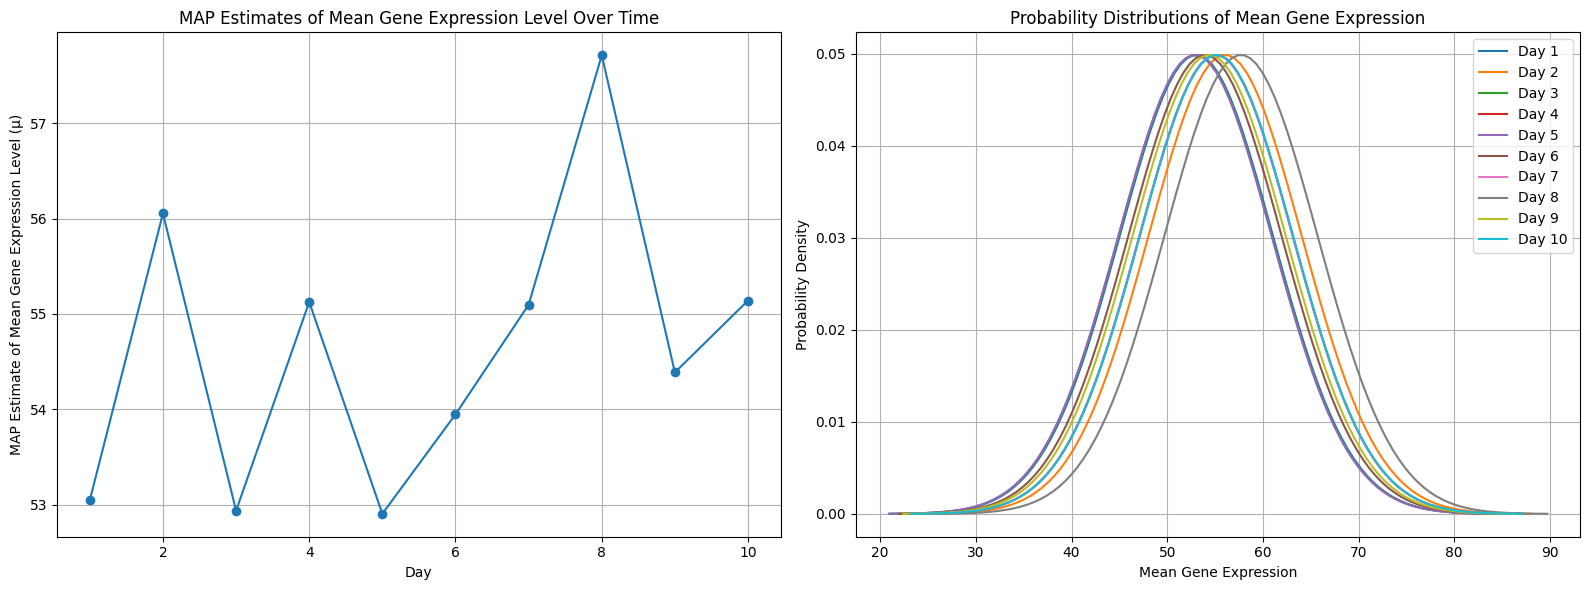

In [23]:
posteriori_mu = []
num_days = 10
initial_paramters = [1.0]

for i in range(10):
  day_data = df.iloc[:, i]

  mu_0 = np.mean(day_data, axis = 0)
  std_0 = np.std(day_data, axis = 0)

  result = minimize(map_log_likelihood, initial_paramters, args = (df.iloc[:, i], mu_0, std_0))

  estimated_mu = result.x[0]
  posteriori_mu.append(estimated_mu)

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot the MAP estimates of the mean gene expression level
axs[0].plot(range(1, num_days + 1), posteriori_mu, marker='o', linestyle='-')
axs[0].set_xlabel('Day')
axs[0].set_ylabel('MAP Estimate of Mean Gene Expression Level (μ)')
axs[0].set_title('MAP Estimates of Mean Gene Expression Level Over Time')
axs[0].grid()

# Plot individual normal distributions for each day
for i in range(num_days):
    day_data = df['Day ' + str(i+1)]
    x = np.linspace(posteriori_mu[i] - 4*8, posteriori_mu[i] + 4*8, 100)
    y = (1/(8 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - posteriori_mu[i]) / 8)**2)
    axs[1].plot(x, y, label=f'Day {i+1}')

axs[1].set_xlabel('Mean Gene Expression')
axs[1].set_ylabel('Probability Density')
axs[1].set_title('Probability Distributions of Mean Gene Expression')
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()